In [72]:
path_avg = '/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/'
path_rnn = '/nfshome/llayer/AIErrorLogAnalysis/experiments/VAR_DIM/'
path_rnn_att = '/nfshome/llayer/AIErrorLogAnalysis/experiments/VAR_DIM_Att/'
path_embedding = '/nfshome/llayer/AIErrorLogAnalysis/experiments/EMBEDDING/'
path_dimred = '/storage/user/llayer/AIErrorLogAnalysis/experiments/DIMRED/'
path_base = '/nfshome/llayer/AIErrorLogAnalysis/experiments_baseline/BASELINE_PRUNE_NEG/skopt.h5'

In [73]:
import pandas as pd
import glob
import json

In [74]:
base = pd.read_hdf(path_base)

In [75]:
base.head()

,call,learning_rate,dense_units,dense_layers,regulizer_value,dropout_value,batch_size,cv_score,std
0,24,0.003767,85,7,0.001624,0.063311,2521,0.831931,0.003715
1,0,0.005675,35,6,0.001000,0.052315,2000,0.829383,0.008777
2,16,0.004992,38,6,0.000208,0.277090,500,0.827555,0.004905
3,14,0.008565,65,7,0.000135,0.259290,2468,0.826332,0.006256
4,18,0.005742,100,8,0.000010,0.032497,3971,0.824065,0.003424


In [76]:
def read_json(path):
    params = []
    for eh  in  glob.glob(path+'*.json'):
        print( eh )
        ehf = json.loads(open(eh).read())
        res = ehf['params']
        res['result'] = ehf['result']
        res['std'] = ehf['std_dv']
        params.append( res )
        print (res['result'])
    results = pd.DataFrame(params)
    results = results.sort_values(by=['result'])
    return results

In [77]:
avg = read_json(path_avg)
#rnn = read_json(path_rnn)
#rnn_att = read_json(path_rnn_att)
#rnn_embedd = read_json(path_embedding)
rnn_dimred = read_json(path_dimred)

/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/ead8a563b10edb48d03b642867e14faa.json
-0.7818904305990452
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/3db6bc61f0cff8105778c10dfcf6980d.json
-0.8180539554102664
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/8456b43f1481c4af55cb0815ce62bd1b.json
-0.8021012128459793
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/6c050b4a4c1b6f889bde011d83b95b93.json
-0.7579575168021454
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/e55b00c3af9f9a5831ba870149522490.json
-0.8209483846882278
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/32137f4c6e006a6f778678367af002f2.json
-0.5579466808871778
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/7b6dd56de0341710983d5df1991e6862.json
-0.8138283883179082
/nfshome/llayer/AIErrorLogAnalysis/experiments/AVG_20_encoded/3a125f5842f5efc423fe7211d8463bc8.json
-0.8122785893841019
/nfshome/llayer/AIErrorLogAnalysis/exper

In [78]:
rnn_dimred.head()

,learning_rate,dropout,embedding,rnn_units,units_site,dense_layers,dense_units,encode_sites,result,std
14,0.000010,0.001,5.0,20.0,100.0,5.0,50.0,1.0,-0.833228,0.010969
11,0.000037,0.100,20.0,14.0,62.0,2.0,25.0,1.0,-0.831024,0.010876
2,0.000018,0.100,22.0,15.0,54.0,4.0,21.0,1.0,-0.828022,0.010423
6,0.000019,0.100,21.0,15.0,54.0,3.0,21.0,1.0,-0.826678,0.011404
13,0.000010,0.001,5.0,20.0,100.0,1.0,50.0,1.0,-0.824910,0.012229


In [62]:
base_best, base_std = base['cv_score'].iloc[0], base['std'].iloc[1]
avg_best, avg_std = avg['result'].iloc[0], avg['std'].iloc[0]
rnn_best, rnn_std = rnn_dimred['result'].iloc[0], rnn_dimred['std'].iloc[0]
#rnn_best, rnn_std = rnn['result'].iloc[0], rnn['std'].iloc[0]
#rnn_att_best, rnn_att_std = rnn_att['result'].iloc[0], rnn_att['std'].iloc[0]
#rnn_emb_best, rnn_emb_std = rnn_embedd['result'].iloc[0], rnn_embedd['std'].iloc[0]

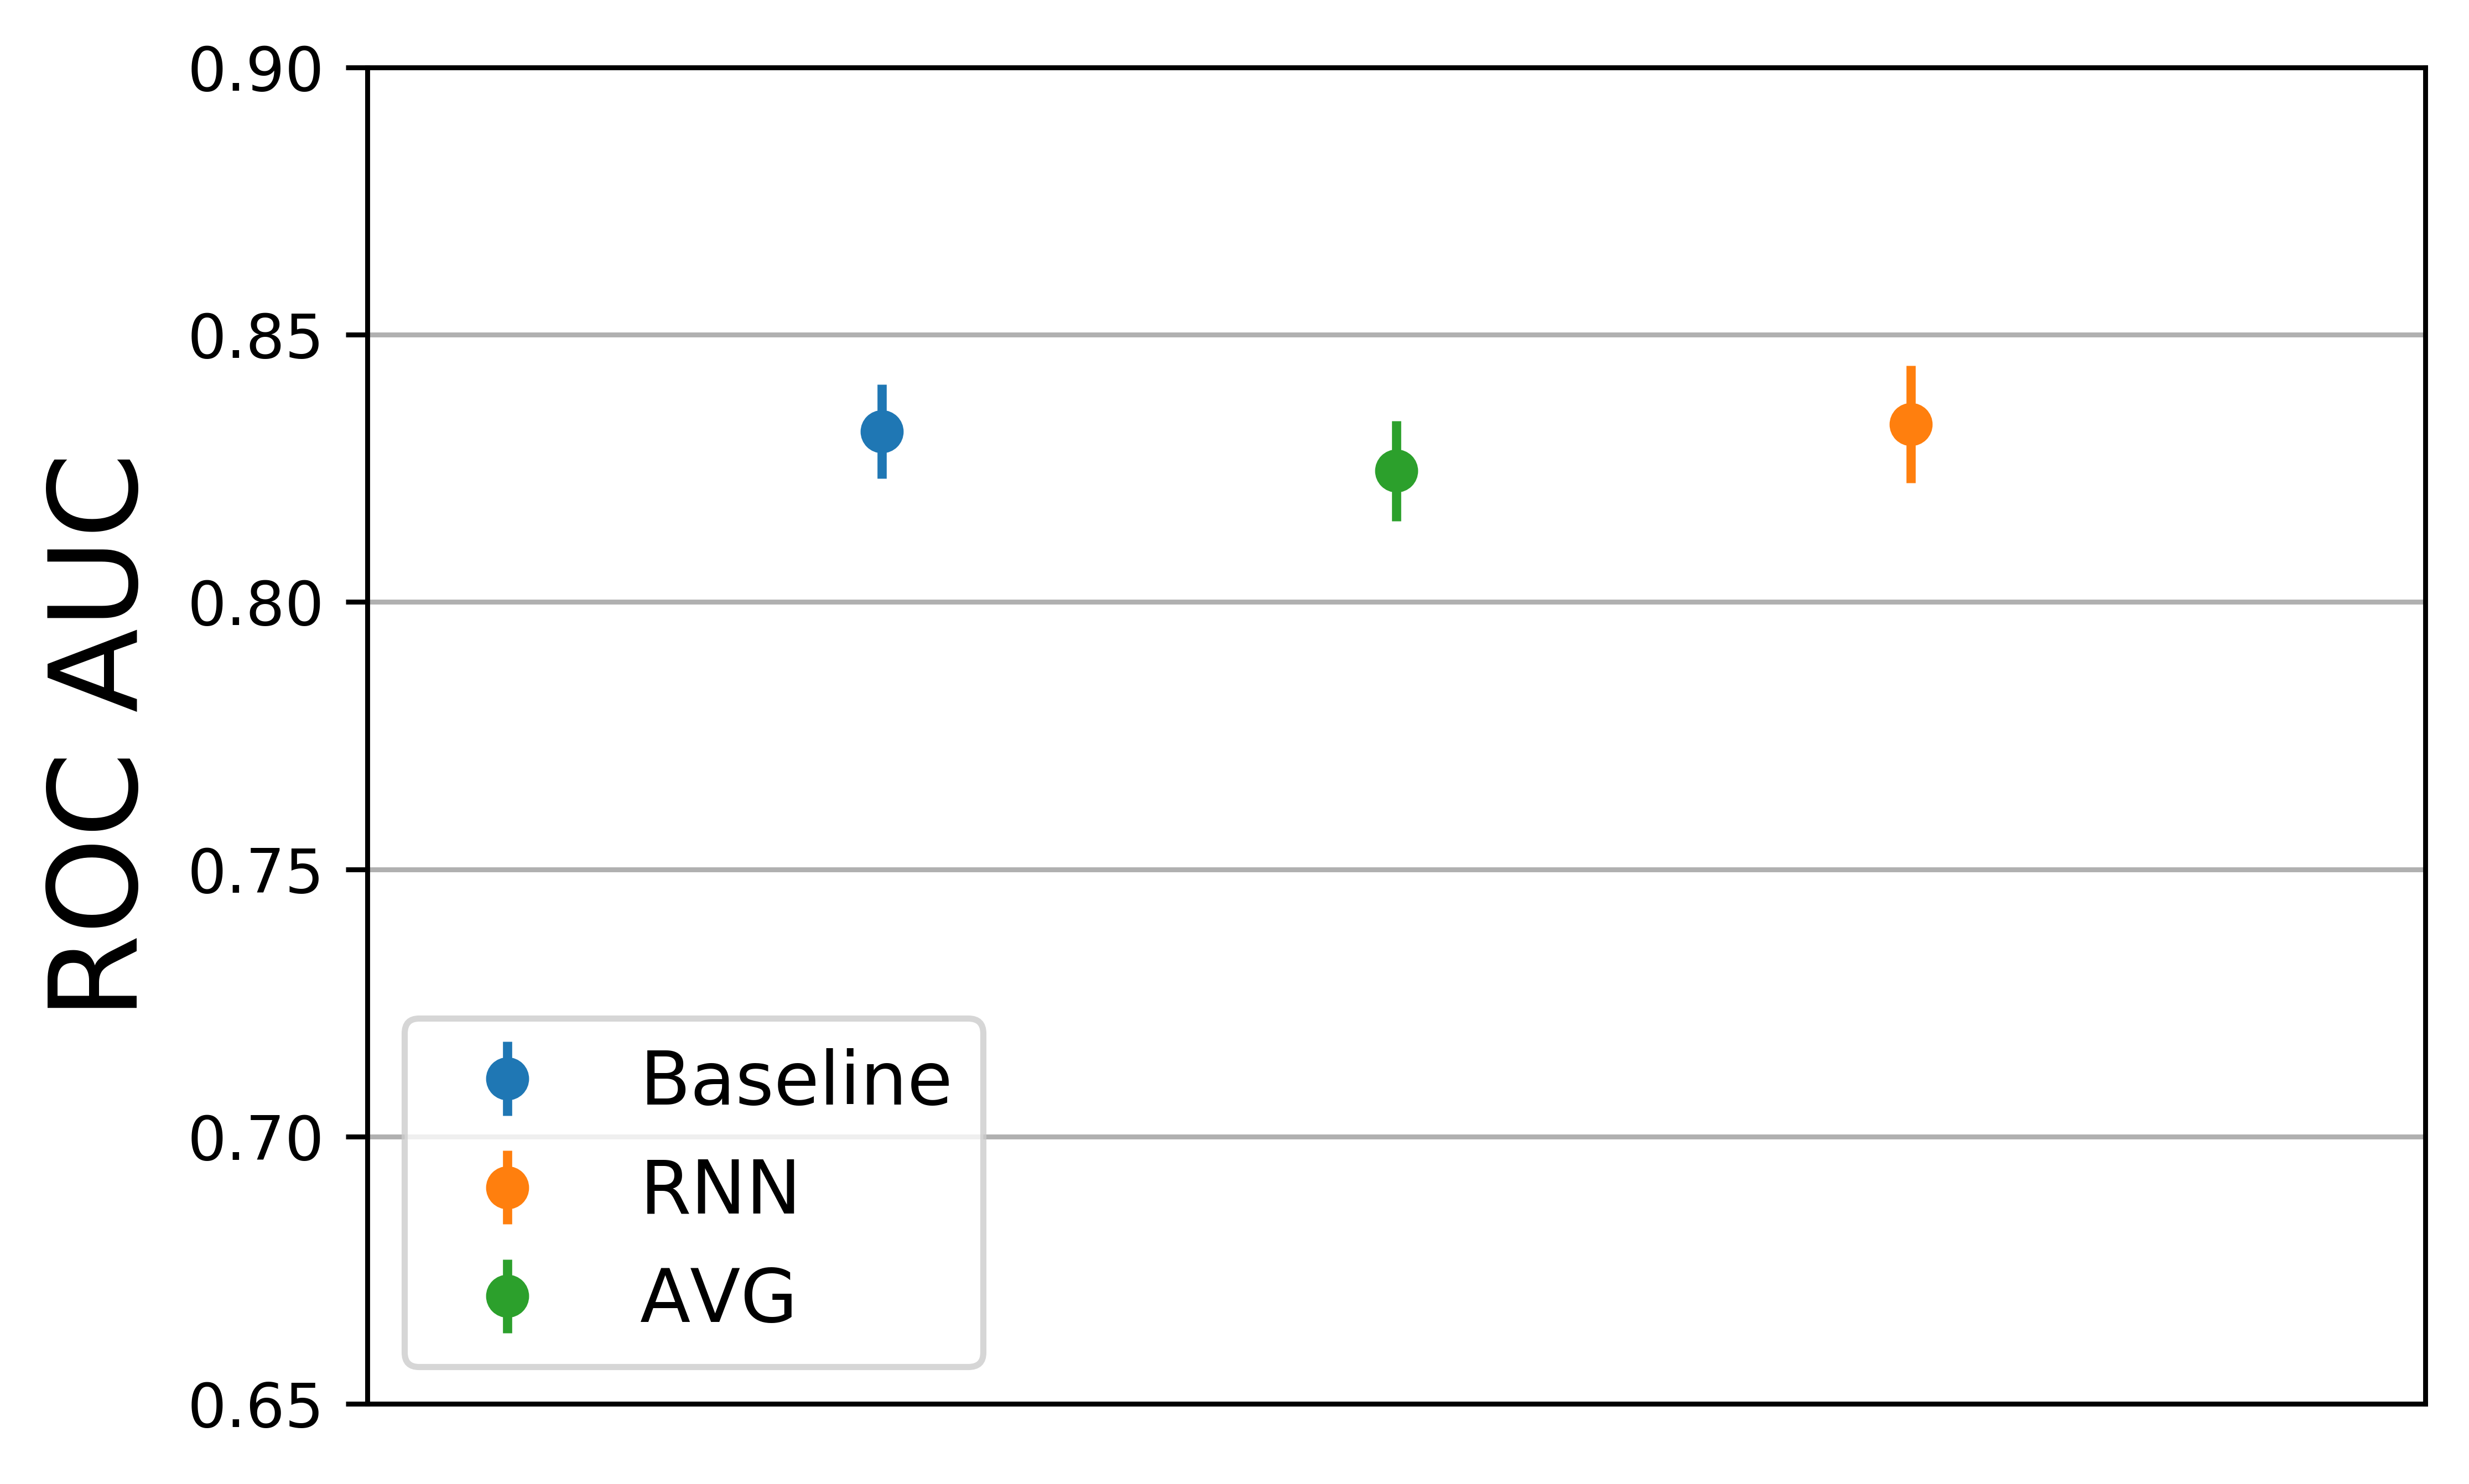

In [71]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,4), dpi=800)
plt.errorbar(0, base_best , yerr=base_std , fmt = 'o', label = 'Baseline')
plt.errorbar(2, rnn_best*-1 , yerr=rnn_std , fmt = 'o', label = 'RNN')
plt.errorbar(1, avg_best*-1 , yerr=avg_std , fmt = 'o', label = 'AVG')
#plt.errorbar(3, rnn_att_best*-1 , yerr=rnn_att_std , fmt = 'o', label = 'RNN + Att')
#plt.errorbar(4, rnn_emb_best*-1 , yerr=rnn_emb_std , fmt = 'o', label = 'RNN + Embedding')
axes = plt.gca()
axes.set_xlim([-1,3])
axes.set_ylim([0.65,0.9])
plt.legend(loc='lower left', prop={'size': 12})
plt.ylabel('ROC AUC', fontsize=20)
plt.xticks([])
plt.gca().yaxis.grid(True)
plt.show()